In [1]:
!pip install imblearn
!pip install autocorrect
!pip install pandas
!pip install delayed
!pip install autocorrect
!pip install pyspark

# import library

In [2]:
#Data Packages
import math
import pandas as pd
import numpy as np
import string
import re
import nltk

from tqdm import tqdm
import sklearn

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download("stopwords")
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.data import find
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from html.parser import HTMLParser
from bs4 import BeautifulSoup
import unicodedata
from nltk.tokenize import word_tokenize 
import matplotlib.pyplot as plt
from autocorrect import spell
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestRegressor
pd.set_option('display.max_columns', None)
# from pyspark.sql.functions import *
# from pyspark.sql.types import *
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit
import pyspark.sql.functions as func
from keras.models import load_model
%matplotlib inline
import sys
print(sys.version) # showing current python version
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


# Data Preprocessing (train.csv)

## Train.csv cleaning

In [3]:
df = pd.read_csv('train.csv.zip')

In [4]:
# drop irrelevant columns
df = df.drop(columns = ["image","unixReviewTime"])

In [5]:
df.dtypes

overall       float64
reviewTime     object
reviewerID     object
reviewText     object
summary        object
category       object
price          object
itemID         object
reviewHash      int64
dtype: object

In [6]:
df.shape

(150000, 9)

### Investigating and filling missing values.

In [7]:
# check NaN values
for col in df.columns:
    check_null_col = df[col].isnull().sum()
    print(col, ' has NaN: ', check_null_col)

overall  has NaN:  0
reviewTime  has NaN:  0
reviewerID  has NaN:  0
reviewText  has NaN:  28
summary  has NaN:  29
category  has NaN:  0
price  has NaN:  0
itemID  has NaN:  0
reviewHash  has NaN:  0


Some null values exist in both review and summary features

In [8]:
# investigate NaN
df.loc[df['reviewText'].isnull()].head(5)

,overall,reviewTime,reviewerID,reviewText,summary,category,price,itemID,reviewHash
1110,5.0,"05 2, 2015",u49639508,NaN,Five Stars,Alternative Rock,$9.97,p04433744,20257111
6970,5.0,"12 21, 2017",u52398997,NaN,NaN,Alternative Rock,$4.79,p59353048,20564617
8700,5.0,"06 30, 2017",u50816000,NaN,Five Stars,Alternative Rock,$8.97,p78784315,58346600
12883,5.0,"11 4, 2016",u49639508,NaN,Five Stars,Alternative Rock,$6.64,p16119061,29379517
15271,5.0,"05 10, 2015",u10618578,NaN,Five Stars,Pop,$12.72,p40863134,24905487


In [9]:
# investigate NaN
df.loc[df['summary'].isnull()].head(5)

,overall,reviewTime,reviewerID,reviewText,summary,category,price,itemID,reviewHash
6970,5.0,"12 21, 2017",u52398997,NaN,NaN,Alternative Rock,$4.79,p59353048,20564617
9042,5.0,"06 20, 2007",u13195817,This is so great to have all the songs of Paul...,NaN,Pop,$2.74,p54473431,61531189
19014,5.0,"12 21, 2017",u52398997,NaN,NaN,Alternative Rock,$10.99,p89969829,66681400
25361,5.0,"02 22, 2018",u52398997,NaN,NaN,Pop,$0.98,p21592798,89039286
25975,5.0,"08 4, 2008",u13195817,"Wow, am I impressed. It's been about a 17 yea...",NaN,Pop,$4.71,p50683294,47132370


The null summary entries will be filled with corresponding music genre (category value), and null review entries are replaced with summary texts.

In [10]:
# fill null summary with category 
df['summary'] = df['summary'].fillna(df['category'])
# fill null reviewText with summary
df['reviewText'] = df['reviewText'].fillna(df['summary'])

In [11]:
# check NaN values
for col in df.columns:
    check_null_col = df[col].isnull().sum()
    print(col, ' has NaN: ', check_null_col)

overall  has NaN:  0
reviewTime  has NaN:  0
reviewerID  has NaN:  0
reviewText  has NaN:  0
summary  has NaN:  0
category  has NaN:  0
price  has NaN:  0
itemID  has NaN:  0
reviewHash  has NaN:  0


The review time and price will be converted into date-time object and float numbers respectively, for consistency of feature type and preparation of data exploration.

In [12]:
# convert reviewTime to datetime object
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

In [13]:
# fill in mode price if price column has irrelevant information (html noise data)
df['price'] = df['price'].apply(lambda x: np.nan if x.startswith('.a-') else x)

In [14]:
# regex price column by removing $ and , sign
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [15]:
df['price'].fillna(df['price'].mean(), inplace=True) # fill null with mean price

Removing HTML tags

In [16]:
# regex summary and reviewText column by removing html tags
df['summary'] = df['summary'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)
df['reviewText'] = df['reviewText'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)

## Vader sentiment for summary and reviewText

Using Vader polarity score to evaluate the sentiment on every user’s review text and summary.

In [17]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)   # take "polarity score" as inputs
            pdlist.append([ss['neg']]+[ss['neu']]+[ss['pos']]+[ss['compound']]) #outputs compound scores
        reviewDf = pd.DataFrame(pdlist) 
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

Applying Vader to the `reviewText` feature.

In [18]:
# apply vader to reviewText
reviews = df['reviewText'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['vadertext_neg','vadertext_neu','vadertext_pos','vadertext_compound'])

100%|██████████| 150000/150000 [04:31<00:00, 552.38it/s]


Applying Vader to the `summary` feature.

In [19]:
# apply vader to summary
summary = df['summary'].values
summaryDF = evalSentences(summary, to_df=True, columns=['vadersummary_neg','vadersummary_neu','vadersummary_pos','vadersummary_compound'])

100%|██████████| 150000/150000 [00:12<00:00, 11605.71it/s]


In [20]:
df = pd.concat([df,reviewDF,summaryDF],axis=1) 

## One-hot encode category

The music categories will be one-hot encoded to create additional features and transform categorical music genres to be more expressive.

In [21]:
# one-hot encode category
dummies_genre = pd.get_dummies(df['category'], prefix='category')
df = pd.concat([df,dummies_genre], axis=1)

## Tokenization, lowercasing, stopwords removal and stemming.

Performing further text preprocessing on `reviewText` and `summary` column.

In [22]:
tokenizer = RegexpTokenizer('\w+')
df['reviewText'] = df['reviewText'].apply(lambda x: tokenizer.tokenize(x))

In [23]:
df['summary'] = df['summary'].apply(lambda x: tokenizer.tokenize(x))

In [24]:
# stop words removal and lower case all texts
stop = set(stopwords.words('english'))
df['reviewText'] = df['reviewText'].apply(lambda x: [item.lower() for item in x if (item not in stop)])
df['summary'] = df['summary'].apply(lambda x: [item.lower() for item in x if (item not in stop)])

In [25]:
# stem the text
ps = PorterStemmer()
df['reviewText'] = df['reviewText'].apply(lambda x: [ps.stem(item) for item in x])
df['summary'] = df['summary'].apply(lambda x: [ps.stem(item) for item in x])

In [26]:
# convert the stemmed words into string for vectorization
df['summary'] = df['summary'].apply(lambda x: " ".join(x))

In [27]:
df['reviewText'] = df['reviewText'].apply(lambda x: " ".join(x))

In [28]:
df.head(5)

,overall,reviewTime,reviewerID,reviewText,summary,category,price,itemID,reviewHash,vadertext_neg,vadertext_neu,vadertext_pos,vadertext_compound,vadersummary_neg,vadersummary_neu,vadersummary_pos,vadersummary_compound,category_Alternative Rock,category_Classical,category_Dance & Electronic,category_Jazz,category_Pop
0,5.0,2014-08-26,u92990698,a contemporari jazz soul perform made two deca...,classiqu,Jazz,8.40,p23649501,3856620,0.022,0.848,0.130,0.9929,0.0,1.000,0.000,0.0000,0,0,0,1,0
1,5.0,2003-05-11,u36200649,veri good idea put pop orchestr music the matr...,exceed expect thi album rawk,Alternative Rock,10.98,p58458313,56086781,0.034,0.780,0.187,0.9339,0.0,1.000,0.000,0.0000,1,0,0,0,0
2,5.0,2017-12-05,u10721702,thi great collect carol king song,a must carol king fan,Pop,5.99,p97027626,55852154,0.000,0.631,0.369,0.6249,0.0,1.000,0.000,0.0000,0,0,0,0,1
3,5.0,2013-09-24,u86003775,the album brilliant piec jazz fusion start fin...,a master piec,Jazz,14.64,p43167086,43228100,0.046,0.816,0.137,0.8824,0.0,1.000,0.000,0.0000,0,0,0,1,0
4,5.0,2015-01-14,u25672859,wait long time dvd releas have watch 25 year o...,especi like concert video,Alternative Rock,9.92,p94494236,54425467,0.029,0.847,0.124,0.9512,0.0,0.644,0.356,0.4144,1,0,0,0,0


## Length of reviewText

Computing the length of `reviewText` for each user to analyze if there exists correlation between review length and review scores.

In [29]:
# count length of reviewText
df['text_length'] = df['reviewText'].str.len()

In [30]:
# final df
df.head(5)

,overall,reviewTime,reviewerID,reviewText,summary,category,price,itemID,reviewHash,vadertext_neg,vadertext_neu,vadertext_pos,vadertext_compound,vadersummary_neg,vadersummary_neu,vadersummary_pos,vadersummary_compound,category_Alternative Rock,category_Classical,category_Dance & Electronic,category_Jazz,category_Pop,text_length
0,5.0,2014-08-26,u92990698,a contemporari jazz soul perform made two deca...,classiqu,Jazz,8.40,p23649501,3856620,0.022,0.848,0.130,0.9929,0.0,1.000,0.000,0.0000,0,0,0,1,0,1577
1,5.0,2003-05-11,u36200649,veri good idea put pop orchestr music the matr...,exceed expect thi album rawk,Alternative Rock,10.98,p58458313,56086781,0.034,0.780,0.187,0.9339,0.0,1.000,0.000,0.0000,1,0,0,0,0,297
2,5.0,2017-12-05,u10721702,thi great collect carol king song,a must carol king fan,Pop,5.99,p97027626,55852154,0.000,0.631,0.369,0.6249,0.0,1.000,0.000,0.0000,0,0,0,0,1,33
3,5.0,2013-09-24,u86003775,the album brilliant piec jazz fusion start fin...,a master piec,Jazz,14.64,p43167086,43228100,0.046,0.816,0.137,0.8824,0.0,1.000,0.000,0.0000,0,0,0,1,0,295
4,5.0,2015-01-14,u25672859,wait long time dvd releas have watch 25 year o...,especi like concert video,Alternative Rock,9.92,p94494236,54425467,0.029,0.847,0.124,0.9512,0.0,0.644,0.356,0.4144,1,0,0,0,0,614


## Split train and test in train.csv
Splitting the `train.csv.zip` dataset into train (70%) and test(30%).

In [31]:
train_data = df.iloc[:,1:]
train_target = df.iloc[:,0]

In [32]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size = 0.3, random_state = 7)

## User, item and category average (rating)

Computing user, music item and category rating average of every entry in the training set so that they can later be transferred into validation and test set to represent the corresponding average rating under two situations:
 - if there exists the corresponding ID or music genre, a new feature of its (user, item and category) rating average will be created and, filled with the transferred value from training
 - otherwise, the feature will be filled with the overall average rating if ID occurs in the validation and testing set is new and unseen to the training.

In [33]:
# get column names
column_names=train_data.columns

In [34]:
# add column names to the data
X_train_df=pd.DataFrame(X_train,columns=column_names)
X_test_df=pd.DataFrame(X_test,columns=column_names)

In [35]:
# add rating to the data
X_train_df['overall']=y_train
X_test_df['overall']=y_test

In [36]:
# create dictionary to store user average rating, item average rating and category average rating
user_average_rating_dict={}
item_average_rating_dict={}
category_average_rating_dict={}

In [37]:
# compute user average, item average and category average using training data
X_train_df['user_avg'] = X_train_df.groupby(['reviewerID'])['overall'].transform('mean')
X_train_df['item_avg'] = X_train_df.groupby(['itemID'])['overall'].transform('mean')
X_train_df['category_avg'] = X_train_df.groupby(['category'])['overall'].transform('mean')

In [38]:
# put user average rating in dict
for uid,uavg in zip(X_train_df['reviewerID'],X_train_df['user_avg']):
    user_average_rating_dict[uid]=uavg
    
# put item average rating in dict
for iid,iavg in zip(X_train_df['itemID'],X_train_df['item_avg']):
    item_average_rating_dict[iid]=iavg

# put category average rating in dict
for c,cavg in zip(X_train_df['category'],X_train_df['category_avg']):
    category_average_rating_dict[c]=cavg

In [39]:
# calcualte overall average rating
overall_average=X_train_df['overall'].mean()

In [40]:
# using user average rating information from training set to put values in test set
user_average=[]
for uid in X_test['reviewerID']:
    if uid in user_average_rating_dict.keys():
        user_average.append(user_average_rating_dict[uid])
    else:
        user_average.append(overall_average)
X_test_df['user_avg']=user_average

In [41]:
# using item average rating information from training set to put values in test set
item_average=[]
for iid in X_test['itemID']:
    if iid in item_average_rating_dict.keys():
        item_average.append(item_average_rating_dict[iid])
    else:
        item_average.append(overall_average)
X_test_df['item_avg']=item_average

In [42]:
# using category average rating information from training set to put values in test set
category_average=[]
for c in X_test['category']:
    if c in category_average_rating_dict.keys():
        category_average.append(category_average_rating_dict[c])
    else:
        category_average.append(overall_average)
X_test_df['category_avg']=category_average

## User and category average (price)

In [43]:
# create dictionary to store user average price and category average price
user_average_price_dict={}
category_average_price_dict={}

# compute user average, item average and category average using training data
X_train_df['user_price_avg'] = X_train_df.groupby(['reviewerID'])['price'].transform('mean')
X_train_df['category_price_avg'] = X_train_df.groupby(['category'])['price'].transform('mean')

# put user average price in dict
for uid,uavg in zip(X_train_df['reviewerID'],X_train_df['user_price_avg']):
    user_average_price_dict[uid]=uavg

# put category average price in dict
for c,cavg in zip(X_train_df['category'],X_train_df['category_price_avg']):
    category_average_price_dict[c]=cavg

In [44]:
# calculate overall average price
overall_price_average=X_train_df['price'].mean()

In [45]:
# using user average price information from training set to put values in test set
user_price_average=[]
for uid in X_test['reviewerID']:
    if uid in user_average_price_dict.keys():
        user_price_average.append(user_average_price_dict[uid])
    else:
        user_price_average.append(overall_price_average)
X_test_df['user_price_avg']=user_price_average

# using category average price information from training  set to put values in test set
category_price_average=[]
for c in X_test['category']:
    if c in category_average_price_dict.keys():
        category_price_average.append(category_average_price_dict[c])
    else:
        category_price_average.append(overall_price_average)
X_test_df['category_price_avg']=category_price_average

# Data Preprocessing (test.csv)
Performing same data preprocessing steps in the `train.csv.zip` on the `test.csv.zip`.

### Test.csv cleaning

In [46]:
df_t = pd.read_csv('test.csv.zip')

In [47]:
# drop irrelevant columns
df_t = df_t.drop(columns = ["image","unixReviewTime"])

In [48]:
df_t.dtypes

reviewTime    object
reviewerID    object
reviewText    object
summary       object
category      object
price         object
itemID        object
reviewHash     int64
dtype: object

In [49]:
df_t.shape

(20000, 8)

In [50]:
# check NaN values
for col in df_t.columns:
    check_null_col = df_t[col].isnull().sum()
    print(col, ' has NaN: ', check_null_col)

reviewTime  has NaN:  0
reviewerID  has NaN:  0
reviewText  has NaN:  3
summary  has NaN:  4
category  has NaN:  0
price  has NaN:  0
itemID  has NaN:  0
reviewHash  has NaN:  0


In [51]:
# fill null summary with category 
df_t['summary'] = df_t['summary'].fillna(df_t['category'])
# fill null reviewText with summary
df_t['reviewText'] = df_t['reviewText'].fillna(df_t['summary'])

In [52]:
# convert reviewTime to datetime object
df_t['reviewTime'] = pd.to_datetime(df_t['reviewTime'])

In [53]:
# fill in mode price if price column has irrelevant information (html noise data)
df_t['price'] = df_t['price'].apply(lambda x: np.nan if x.startswith('.a-') else x)

In [54]:
# regex price column by removing $ and , sign
df_t['price'] = df_t['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [55]:
df_t['price'].fillna(df_t['price'].mean(), inplace=True) # fill null with mean price

In [56]:
# regex summary and reviewText column by removing html tags
df_t['summary'] = df_t['summary'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)
df_t['reviewText'] = df_t['reviewText'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)

## Vader sentiment for summary and reviewText on the test dataset.

In [57]:
# apply vader to reviewText
reviews_t = df_t['reviewText'].values
review_t_DF = evalSentences(reviews_t, to_df=True, columns=['vadertext_neg','vadertext_neu','vadertext_pos','vadertext_compound'])

100%|██████████| 20000/20000 [00:35<00:00, 564.28it/s]


In [58]:
# apply vader to summary
summary_t = df_t['summary'].values
summary_t_DF = evalSentences(summary_t, to_df=True, columns=['vadersummary_neg','vadersummary_neu','vadersummary_pos','vadersummary_compound'])

100%|██████████| 20000/20000 [00:01<00:00, 11955.84it/s]


In [59]:
df_t = pd.concat([df_t,review_t_DF,summary_t_DF], axis=1) 

## One-hot encode category on the test dataset.

In [60]:
# one-hot encode category
dummies_genre_t = pd.get_dummies(df_t['category'], prefix='category')
df_t = pd.concat([df_t,dummies_genre_t], axis=1)

In [61]:
# explore # of unique users and items
num_items_t = len(df_t.itemID.unique())
num_users_t = len(df_t.reviewerID.unique())
print("Number of users:", num_users_t)
print("Number of items:", num_items_t)

Number of users: 16276
Number of items: 10535


## Tokenization, lowercasing, stopwords removal and stemming on the test dataset.

In [62]:
tokenizer = RegexpTokenizer('\w+')
df_t['reviewText'] = df_t['reviewText'].apply(lambda x: tokenizer.tokenize(x))

In [63]:
df_t['summary'] = df_t['summary'].apply(lambda x: tokenizer.tokenize(x))

In [64]:
# stop words removal and lower case all texts
stop = set(stopwords.words('english'))
df_t['reviewText'] = df_t['reviewText'].apply(lambda x: [item.lower() for item in x if (item not in stop)])
df_t['summary'] = df_t['summary'].apply(lambda x: [item.lower() for item in x if (item not in stop)])

In [65]:
# stem the text
ps = PorterStemmer()
df_t['reviewText'] = df_t['reviewText'].apply(lambda x: [ps.stem(item) for item in x])
df_t['summary'] = df_t['summary'].apply(lambda x: [ps.stem(item) for item in x])

In [66]:
# convert the stemmed words into string for vectorization
df_t['summary'] = df_t['summary'].apply(lambda x: " ".join(x))

In [67]:
df_t['reviewText'] = df_t['reviewText'].apply(lambda x: " ".join(x))

## Length of reviewText
Computing length of `reviewText` column.

In [68]:
# count length of reviewText
df_t['text_length'] = df_t['reviewText'].str.len()

## User average, item average, category average (rating)

In [69]:
# using user average rating information from training set to put values in test data
user_average=[]
for uid in df_t['reviewerID']:
    if uid in user_average_rating_dict.keys():
        user_average.append(user_average_rating_dict[uid])
    else:
        user_average.append(overall_average)
df_t['user_avg']=user_average

In [70]:
# using item average rating information from training set to put values in test data
item_average=[]
for iid in df_t['itemID']:
    if iid in item_average_rating_dict.keys():
        item_average.append(item_average_rating_dict[iid])
    else:
        item_average.append(overall_average)
df_t['item_avg']=item_average

In [71]:
# using category average rating information from training set to put values in test data
category_average=[]
for c in df_t['category']:
    if c in category_average_rating_dict.keys():
        category_average.append(category_average_rating_dict[c])
    else:
        category_average.append(overall_average)
df_t['category_avg']=category_average

## User and category average (price)

In [72]:
# using user average price information from training set to put values in test data
user_price_average=[]
for uid in df_t['reviewerID']:
    if uid in user_average_price_dict.keys():
        user_price_average.append(user_average_price_dict[uid])
    else:
        user_price_average.append(overall_price_average)
df_t['user_price_avg']=user_price_average

# using category average price information from training set to put values in test data
category_price_average=[]
for c in df_t['category']:
    if c in category_average_price_dict.keys():
        category_price_average.append(category_average_price_dict[c])
    else:
        category_price_average.append(overall_price_average)
df_t['category_price_avg']=category_price_average

In [73]:
df_t.head(5)

,reviewTime,reviewerID,reviewText,summary,category,price,itemID,reviewHash,vadertext_neg,vadertext_neu,vadertext_pos,vadertext_compound,vadersummary_neg,vadersummary_neu,vadersummary_pos,vadersummary_compound,category_Alternative Rock,category_Classical,category_Dance & Electronic,category_Jazz,category_Pop,text_length,user_avg,item_avg,category_avg,user_price_avg,category_price_avg
0,2017-02-11,u04140621,ok,five star,Pop,31.20,p65721979,98944233,0.000,0.000,1.000,0.2960,0.0,1.000,0.000,0.0000,0,0,0,0,1,2,4.404200,4.200000,4.426863,13.674684,13.590955
1,2018-01-29,u74766187,the 1955 1958 set alon worth purchas cost ever...,buy it for 1955 set with monk,Jazz,34.04,p87809670,33903910,0.126,0.770,0.104,-0.1007,0.0,1.000,0.000,0.0000,0,0,0,1,0,59,5.000000,4.500000,4.543664,12.460000,14.321623
2,2005-08-29,u31689638,mari j blige someon peopl know she first appea...,mari excel debut classic,Pop,1.72,p52702240,35386470,0.073,0.713,0.214,0.9850,0.0,0.412,0.588,0.6467,0,0,0,0,1,509,5.000000,4.937500,4.426863,8.285000,13.590955
3,2015-11-02,u35613516,veri good satch album,four star,Pop,10.99,p01314374,12404766,0.000,0.484,0.516,0.4927,0.0,1.000,0.000,0.0000,0,0,0,0,1,21,3.000000,4.052632,4.426863,3.590000,13.590955
4,2012-01-03,u93320378,well hundr christma antholog thi one best ever...,cd live name,Alternative Rock,7.98,p84396269,68253688,0.000,0.796,0.204,0.9467,0.0,1.000,0.000,0.0000,1,0,0,0,0,171,4.428571,4.404200,4.282495,13.528571,12.218547


## Text preprocessing for Review Text and Summary.

In [74]:
# read data
train_df=pd.read_csv('train.csv.zip')
test_df=pd.read_csv('test.csv.zip')

Fill null value

In [75]:
# fill null summary with category 
train_df['summary'] = train_df['summary'].fillna(train_df['category'])
# fill null reviewText with summary
train_df['reviewText'] = train_df['reviewText'].fillna(train_df['summary'])

In [76]:
# fill null summary with category 
test_df['summary'] = test_df['summary'].fillna(test_df['category'])
# fill null reviewText with summary
test_df['reviewText'] = test_df['reviewText'].fillna(test_df['summary'])

Removing html tags

In [77]:
# regex summary and reviewText column by removing html tags
train_df['summary'] = train_df['summary'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)
train_df['reviewText'] = train_df['reviewText'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)

In [78]:
# regex summary and reviewText column by removing html tags
test_df['summary'] = test_df['summary'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)
test_df['reviewText'] = test_df['reviewText'].replace({'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});': ''}, regex=True)

Remove special characters

In [79]:
# remove special character
train_df['summary'] = train_df['summary'].replace({'[^A-Za-z0-9]+': ' '}, regex=True)
train_df['reviewText'] = train_df['reviewText'].replace({'[^A-Za-z0-9]+': ' '}, regex=True)

In [80]:
# remove special character
test_df['summary'] = test_df['summary'].replace({'[^A-Za-z0-9]+': ' '}, regex=True)
test_df['reviewText'] = test_df['reviewText'].replace({'[^A-Za-z0-9]+': ' '}, regex=True)

Lower casing, remove stopwords, lemmatizing for reviewText

In [81]:
nltk_stopwords=set(stopwords.words('english'))
stemmer=PorterStemmer()

Training data

In [82]:
# preprocess reviewText
train_review_text=train_df['reviewText']
test_review_text=test_df['reviewText']
processed_train_review_text=[]
processed_test_review_text=[]
# iterate through each review
for r in train_review_text:
    token=[]
    # lower casing
    r=r.lower()
    # tokenizing
    r=r.split()
    # iterate through each token
    for i in r:
        # if token not a stopword
        if i not in nltk_stopwords:
            # lemmatizing
            i=stemmer.stem(i)
            token.append(i)
    # combine tokens into string
    review=' '.join(token)
    # append preprocessed review
    processed_train_review_text.append(review)

Test data

In [83]:
# iterate through each review
for r in test_review_text:
    token=[]
    # lower casing
    r=r.lower()
    # tokenizing
    r=r.split()
    # iterate through each token
    for i in r:
        # if token not a stopword
        if i not in nltk_stopwords:
            # lemmatizing
            i=stemmer.stem(i)
            token.append(i)
    # combine tokens into string
    review=' '.join(token)
    # append preprocessed review
    processed_test_review_text.append(review)

Lower casing, remove stopwords, lemmatizing for summary

Training data

In [84]:
# preprocess summary
train_summary=train_df['summary']
test_summary=test_df['summary']
processed_train_summary=[]
processed_test_summary=[]
# iterate through each summary
for r in train_summary:
    token=[]
    # lower casing
    r=r.lower()
    # tokenizing
    r=r.split()
    # iterate through each token
    for i in r:
        # if token not a stopword
        if i not in nltk_stopwords:
            # lemmatizing
            i=stemmer.stem(i)
            token.append(i)
    # combine tokens into string
    summary=' '.join(token)
    # append preprocessed review
    processed_train_summary.append(summary)

Test data

In [85]:
# iterate through each summary
for r in test_summary:
    token=[]
    # lower casing
    r=r.lower()
    # tokenizing
    r=r.split()
    # iterate through each token
    for i in r:
        # if token not a stopword
        if i not in nltk_stopwords:
            # lemmatizing
            i=stemmer.stem(i)
            token.append(i)
    # combine tokens into string
    summary=' '.join(token)
    # append preprocessed review
    processed_test_summary.append(summary)

In [86]:
# extract target
train_target=train_df['overall']

In [87]:
# train test split for reviewText
X_train_review,X_validation_review,y_train,y_validation=train_test_split(processed_train_review_text,train_target,test_size=0.3,random_state=7)

In [88]:
# train test split for summary
X_train_summary,X_validation_summary,y_train_summary,y_validation_summary=train_test_split(processed_train_summary,train_target,test_size=0.3,random_state=7)

### CountVectorizer Text Feature

In [89]:
# initialize vectorizer
vectorizer=CountVectorizer(max_features=5000)

In [90]:
# train the vectorizer with review
vectorizer.fit(X_train_review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [91]:
# transform review using trained vectorizer
X_train_tf=vectorizer.transform(X_train_review)
X_validation_tf=vectorizer.transform(X_validation_review)

In [92]:
# convert sparse matrix to dense
X_train_tf=X_train_tf.todense()
X_validation_tf=X_validation_tf.todense()

### TfidfVectorizer Text Feature

In [93]:
#fit vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, max_features=5000) 
tfidf_vectorizer.fit(processed_train_review_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [94]:
tfidf_x_train = tfidf_vectorizer.transform(X_train_review)
tfidf_x_test = tfidf_vectorizer.transform(X_validation_review)

# Visualization to better understand the data

## 1. Visualizing the word cloud of reviews with different scores.

In [95]:
# import word cloud
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud

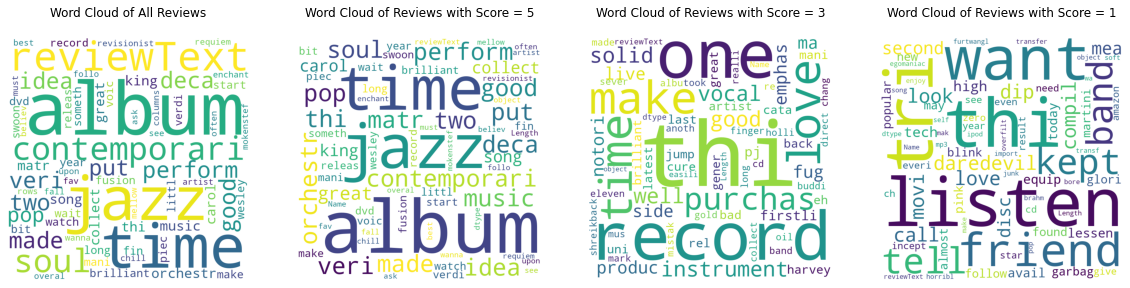

In [96]:
# Create 4 word cloud plots for all reviews, reviews with score = 5/3/1 respectively
wordcloud_1 = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 8).generate(str(df[df['overall']==1.0]['reviewText']))
wordcloud_3 = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 8).generate(str(df[df['overall']==3.0]['reviewText']))  
wordcloud_5 = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 8).generate(str(df[df['overall']==5.0]['reviewText']))  
wordcloud_all = WordCloud(width = 800, height = 800,background_color ='white', min_font_size = 8).generate(str(df[['reviewText']]))  

fig, ax = plt.subplots(1,4,figsize=(20,20))

ax[0].imshow(wordcloud_all)
ax[0].axis('off')
ax[0].set_title('Word Cloud of All Reviews\n')

ax[1].imshow(wordcloud_5)
ax[1].axis('off')
ax[1].set_title('Word Cloud of Reviews with Score = 5\n')

ax[2].imshow(wordcloud_3)
ax[2].axis('off')
ax[2].set_title('Word Cloud of Reviews with Score = 3\n')

ax[3].imshow(wordcloud_1)
ax[3].axis('off')
ax[3].set_title('Word Cloud of Reviews with Score = 1\n')

plt.show()

**Insight:**

The word cloud of all reviews is very similar to the one of reviews with score = 5. This is because most of the reviews are having score 5, so it greatly affects the overall word cloud. As we look at other word clouds, with the score of reviews reduce from 5 to 3 to 1, there do exist some changes in the words. For reviews with score 5, all the words are positive are neutral. For reviews with score 3, the words are mostly neutral. But if we look at the word cloud of score 1, words like 'garbage' and 'daredevil' pop up. Speaking of which, the content of reviews does have an impact on the score.

## 2. Visualizing the distribution of data over price.

In [97]:
X_train_df['price'].describe()

count    105000.000000
mean         13.674684
std          15.822568
min           0.010000
25%           7.740000
50%          11.400000
75%          15.970000
max         799.990000
Name: price, dtype: float64

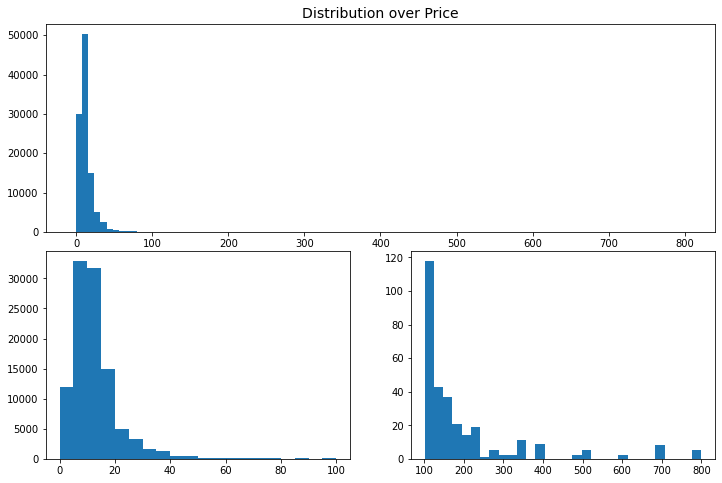

In [98]:
# subplot 1: view the overall distribution -> most data are having low price
# subplot 2: view the distribution under $100 (include 100)
# subplot 3: view the distribution above $100

gridsize = (4, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0),rowspan=2)
ax3 = plt.subplot2grid(gridsize, (2, 1),rowspan=2)
ax1.set_title('Distribution over Price',fontsize=14)
ax1.hist(X_train_df['price'],bins=100);
ax2.hist(X_train_df[X_train_df['price']<=100]['price'],bins=20);
ax3.hist(X_train_df[X_train_df['price']>100]['price'],bins=30);

Visualizing the distribution of review score over price.

In [99]:
# The price range is wide -> want to focus on the price range where 95% of the data locate
np.percentile(X_train_df['price'], 95, axis=0)

29.99

<Figure size 1152x864 with 0 Axes>

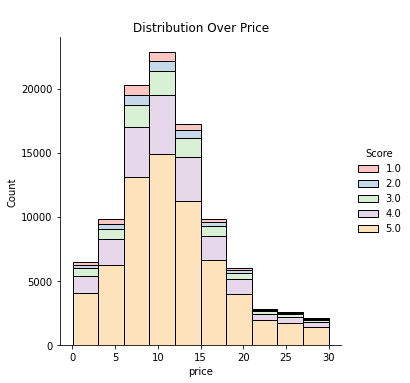

In [100]:
# Create a stacked bar graph
plt.figure(figsize=(16, 12))

p1 = sns.displot(X_train_df, x = X_train_df[X_train_df['price']<=30]['price'], hue = X_train_df['overall'], 
            multiple="stack",bins=10, palette="Pastel1");
p1._legend.set_title("Score")
p1.set(title="\nDistribution Over Price")

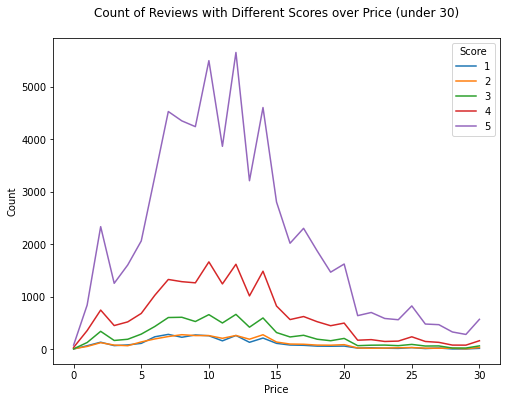

In [101]:
# Create a line plot
df_below30 = X_train_df[X_train_df['price']<=30]
df_below30['roundprice'] = round(df_below30['price'])

fig = plt.figure(figsize=(8,6))

for i in range(1,6):
  df_score = df_below30.loc[df_below30['overall'] == i]
  r = df_score['roundprice'].value_counts().sort_index()
  plt.plot(r)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Reviews with Different Scores over Price (under 30)\n')
plt.legend(range(1,6),title='Score')

**Insight:**

To visualize the scores over price, I tried stacked bar graph first, but all the bars are having the same patters (reviews with score 5 are the most) and it is hard to compare the volume of reviews with different scores. Thus, I plotted a line graph with each individual line represents a score. It is easier to compare the volume now. Again, the trends of review volume vs. price is quite similar for all scores. The lines fluctuate slightly different from each other. This indicates that price takes a small part in predicting score.

## 3. Visualizing the distribution of data over review time.

In [102]:
# Overview the review time of data
X_train_df['reviewTime'].dt.year.describe()

count    105000.000000
mean       2010.210562
std           5.415314
min        1998.000000
25%        2005.000000
50%        2012.000000
75%        2015.000000
max        2018.000000
Name: reviewTime, dtype: float64

In [103]:
# Define the bins
year_bin = []
for i in range(1998,2019,2):
  year_bin.append(i)

<Figure size 1152x864 with 0 Axes>

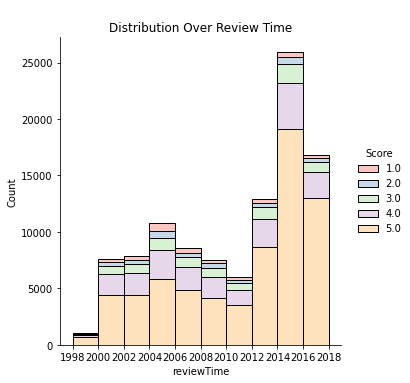

In [104]:
plt.figure(figsize=(16, 12))
p2 = sns.displot(X_train_df, x = X_train_df['reviewTime'].dt.year, hue = X_train_df['overall'], 
            multiple="stack",bins=10, palette="Pastel1");
p2._legend.set_title("Score")
p2.set(xticks=year_bin)
p2.set(title="\nDistribution Over Review Time")

**Insight:**

Similar to the price distribution, the stacked bar of distribution over review time doesn't help us determine if review time has any impact in predicting score. To better visualize its impact, I combine the review time with the music category, please refer to 5.Change in Score w.r.t Review Time.

## 4. Visualizing the distribution of score for each music category.

In [105]:
# Store the names of 5 categories
cat = ['category_Alternative Rock', 'category_Classical','category_Dance & Electronic', 'category_Jazz', 'category_Pop']

# Clean the names of category
cat_name = ['Alternative Rock', 'Classical','Dance & Electronic', 'Jazz', 'Pop']

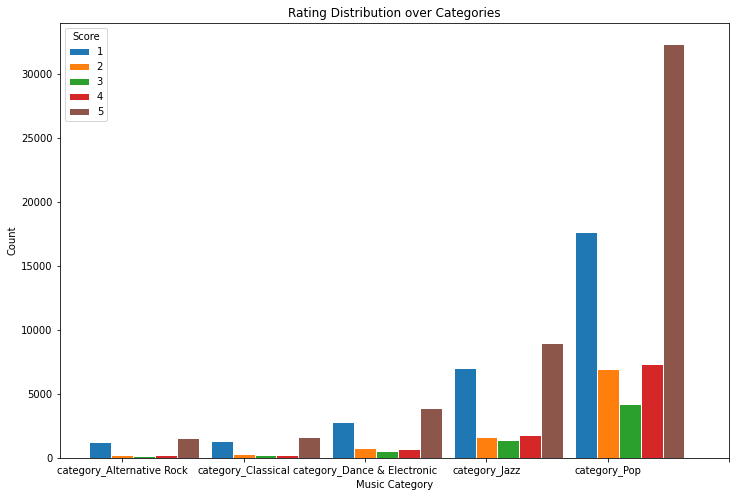

In [106]:
# set height of bars

barWidth = 0.18
bar_height = np.zeros(shape=(5,5))
for i in range(5):
  score_count = X_train_df[X_train_df[cat[i]]==1][['overall',cat[i]]].groupby(['overall']).sum().reset_index()
  score_count = score_count[cat[i]].to_numpy()
  bar_height[:,i] = score_count

# set colors of bars
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b']

fig = plt.figure(figsize=(12,8))

# Set position of first bar on X axis
r = np.arange(5)

for i in range(5):
  plt.bar(r,bar_height[:,i],color=color[i], width=barWidth, edgecolor='white', label=i+1)
  r = r + barWidth

plt.xlabel('Music Category')
plt.ylabel('Count')
plt.title('Rating Distribution over Categories')

# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(6)], cat)
 
# Create legend & Show graphic
plt.legend(title = 'Score')
plt.show()


**Insight:**

The rating distribution of each category is plotted above. There are some similar patterns: score 5 always has the highest amount, score 1 is the second highest, while score 3 always has the lowest amount. However, the distribution of rating slight varies from different categories. For example, pop music has more reviews with score 4 than score 2, while jazz music has more reviews with score 2 than score 4. Therefore, music category is an important feature in predicting the scores.

## 5. Visualizing the change in score with respect to review time of each category.

Count of category_Alternative Rock : 29958


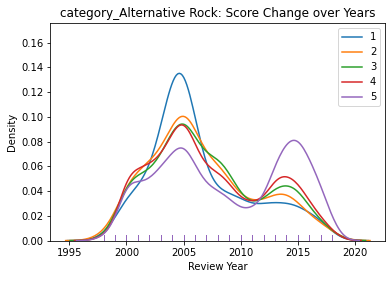

Count of category_Classical : 9794


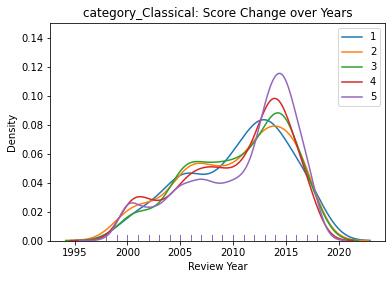

Count of category_Dance & Electronic : 6615


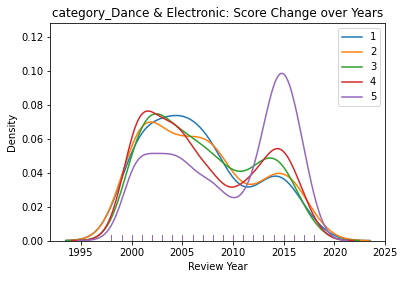

Count of category_Jazz : 10306


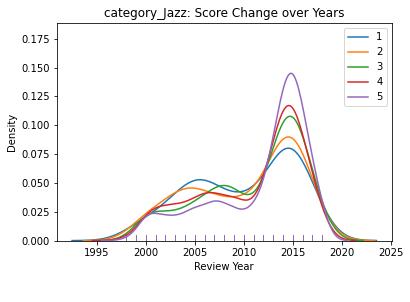

Count of category_Pop : 48327


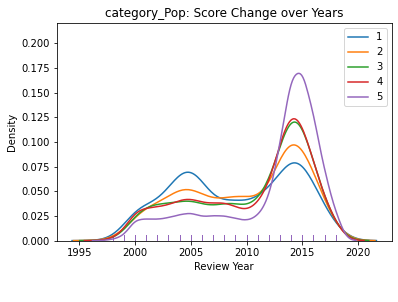

In [107]:
for i in range(5):
  df_cat = X_train_df[X_train_df[cat[i]]==1]

  unique_vals = range(1,6)
  targets = [df_cat.loc[df_cat['overall'] == val] for val in unique_vals]

  # Iterate through list and plot the sliced dataframe
  print("Count of",cat[i],":",df_cat[cat[i]].count())
  for target in targets:
      p2 = sns.distplot(target['reviewTime'].dt.year,hist=False,rug=True);
      p2.set(xlabel="Review Year\n\n")
      p2.set(title=cat[i]+": Score Change over Years")    
  p2.legend(labels=unique_vals)
  plt.show()  
  



**Insight:**

Density of reviews with different scores vs. review time are plotted as individual lines for each category. The plots displayed above are informative, they can tell us the amount of reviews of each category over years, as well as if the taste of customers has been changed.For classical music, different ratings have similar patterns which means customers are holding the similar opinions over the years. For Rock music, the density curves reveal that it was not accepted by the public in the early 21st century (low ratings), and it has been gradually accepted with more clients giving score 5. 

In general, review time has relatively small impact on the rating score and it does not provide useful information when predicting the rating. 

# Feature selection

### Visualize correlation between features and target
1.The features having high correlation with target should be considered.

2.The features having high correlation among themselves should also be removed as, "they are acting two independent variables doing same work" then why keep both.

In [108]:
fs_train = X_train_df.drop(['reviewTime', 'reviewerID','reviewText','summary','category','itemID','reviewHash'], axis=1)

Top 5 most important features of Review Score based on Absolute Correlation:
user_avg              0.789162
item_avg              0.538006
vadersummary_neg      0.303696
vadertext_neg         0.295254
vadertext_compound    0.260676
Name: overall, dtype: float64 

Top 5 least important features of Review Score based on Absolute Correlation:
price                          0.024458
user_price_avg                 0.022252
category_Pop                   0.020914
vadersummary_neu               0.017258
category_Dance & Electronic    0.001380
Name: overall, dtype: float64


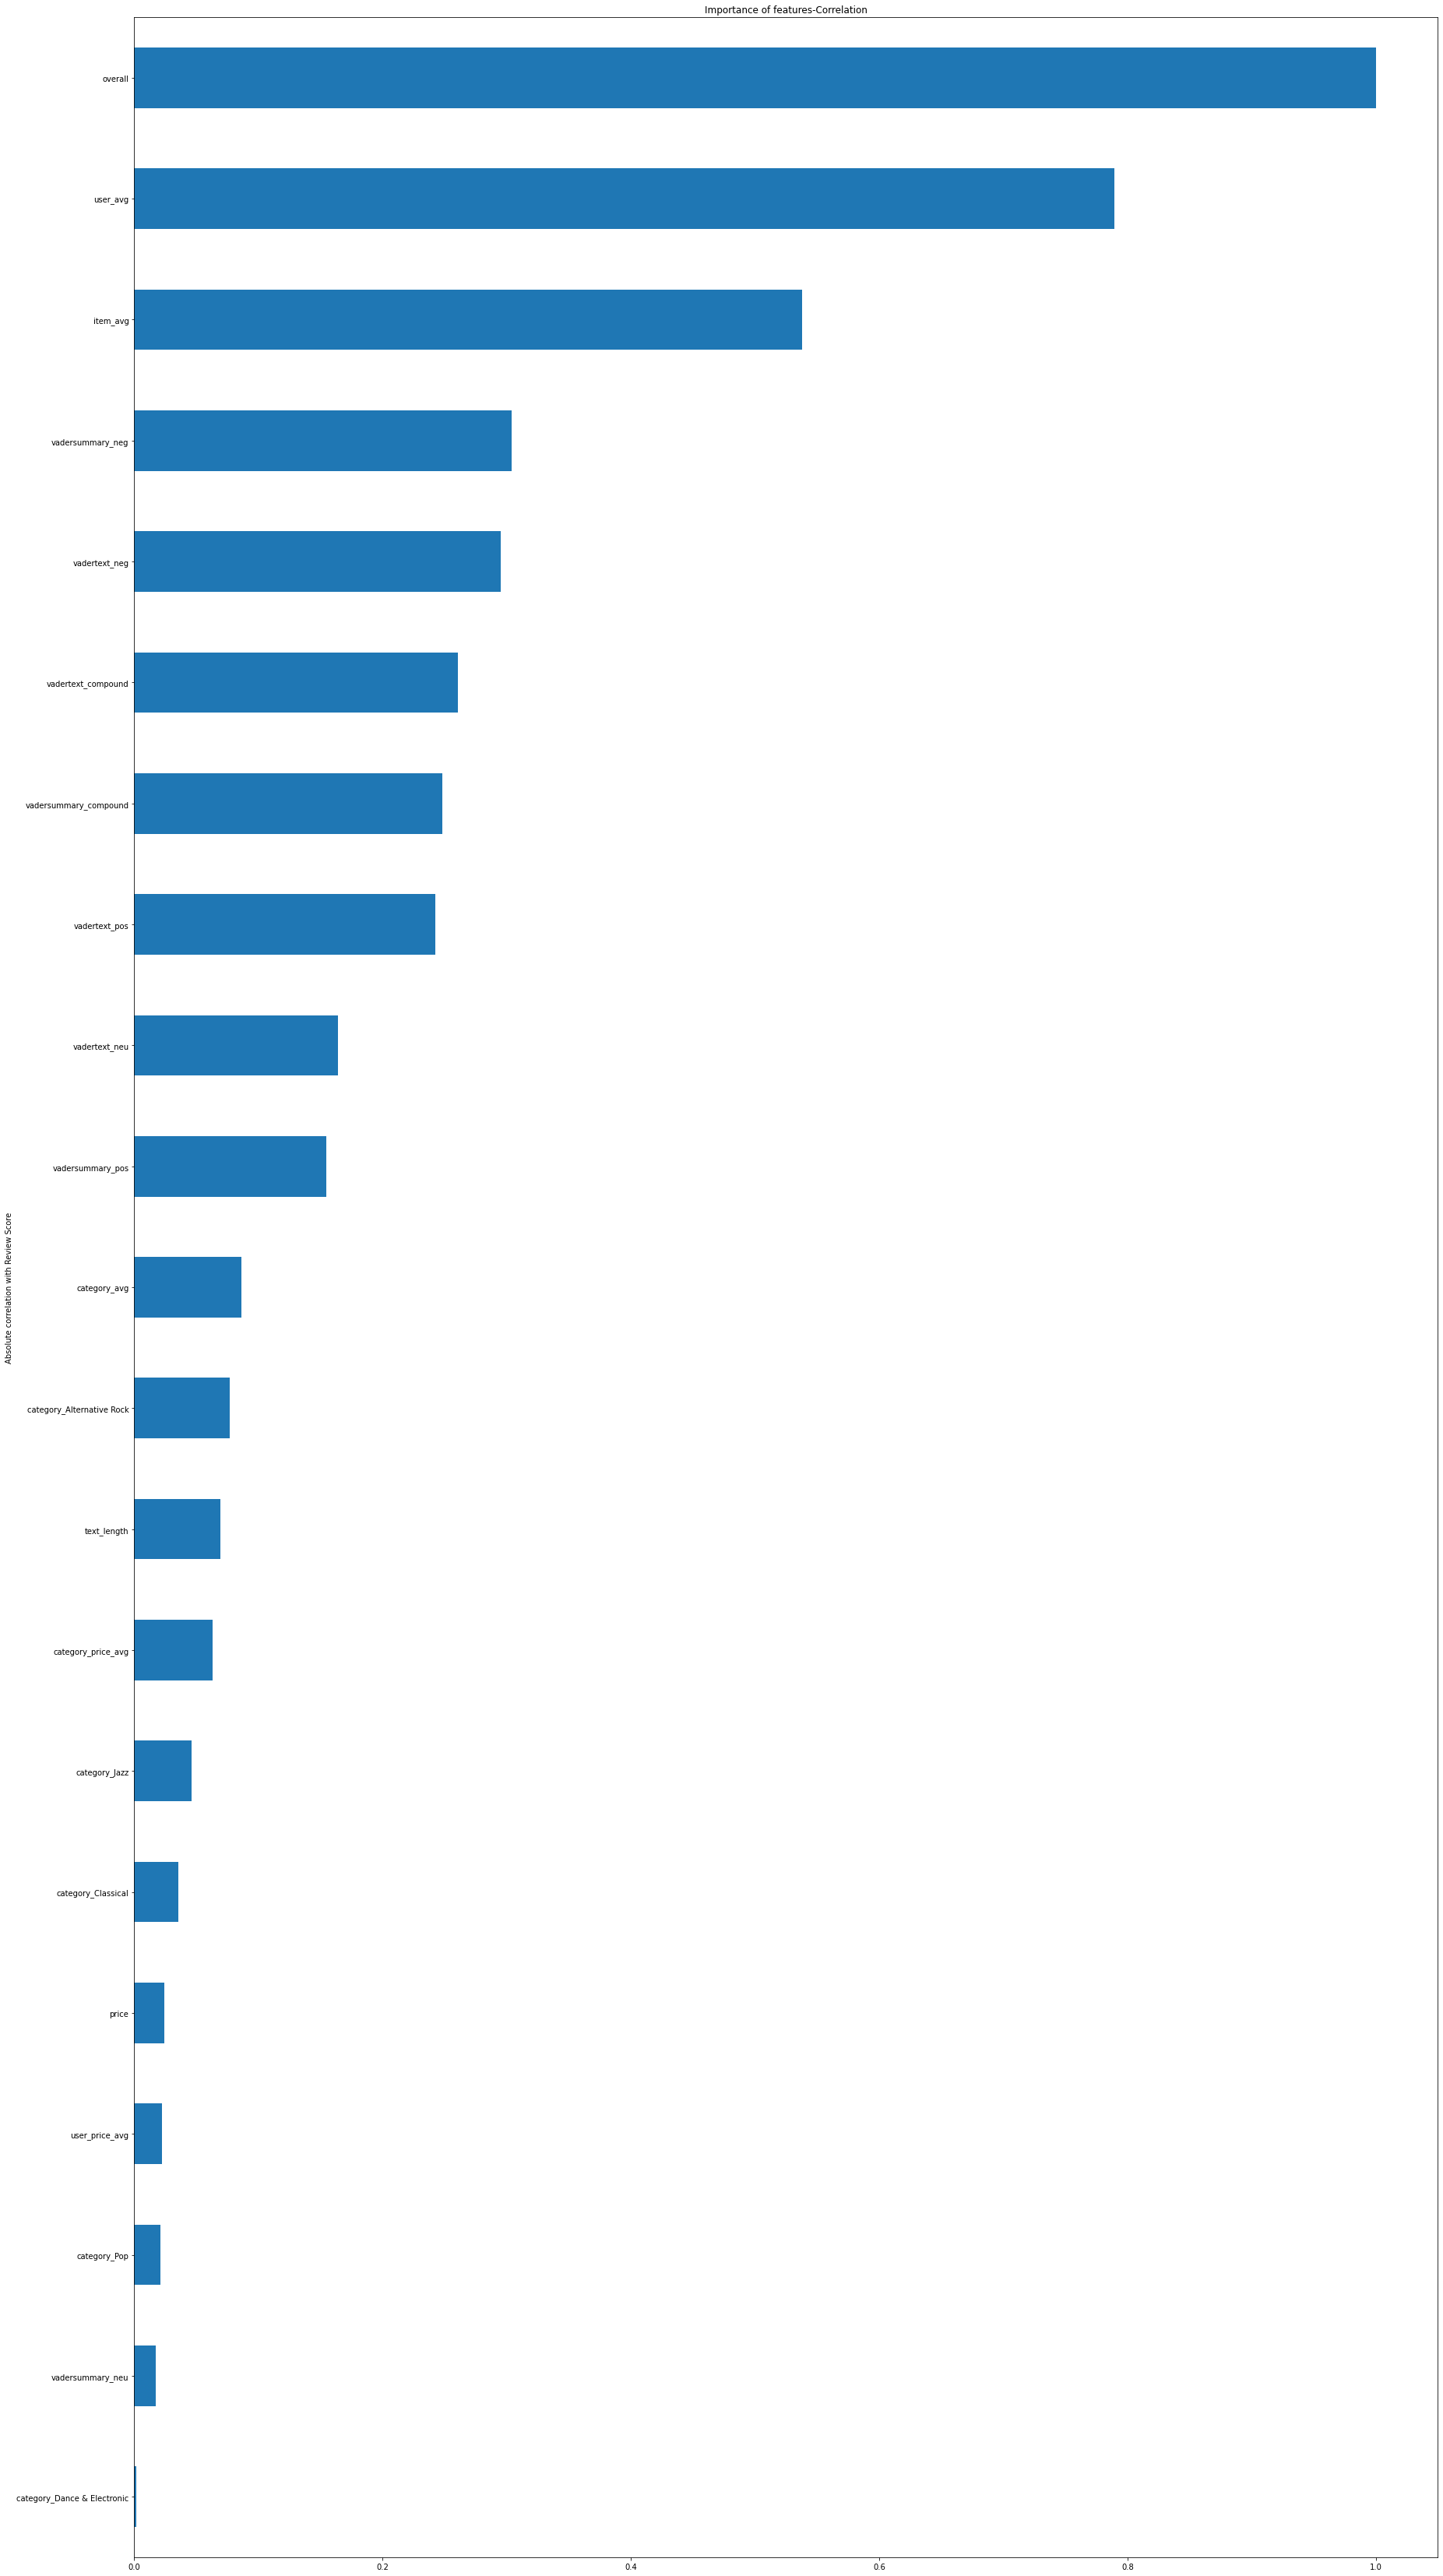

In [109]:
#plot the abs correlation between features and target
corr = fs_train.corr()
correlation = corr.overall.apply(lambda x: abs(x)).sort_values()
ax = (correlation.plot(kind="barh",figsize=(30,60),title="Importance of features-Correlation"))
ax.set_ylabel('Absolute correlation with Review Score')

print("Top 5 most important features of Review Score based on Absolute Correlation:")
print(correlation.sort_values(ascending=False)[1:6],"\n")

print("Top 5 least important features of Review Score based on Absolute Correlation:")
print(correlation.sort_values(ascending=False)[-5:])

### Checking the absolute correlation between features and target.


In [110]:
correlation.sort_values

<bound method Series.sort_values of category_Dance & Electronic    0.001380
vadersummary_neu               0.017258
category_Pop                   0.020914
user_price_avg                 0.022252
price                          0.024458
category_Classical             0.035288
category_Jazz                  0.045979
category_price_avg             0.063342
text_length                    0.069111
category_Alternative Rock      0.076847
category_avg                   0.086568
vadersummary_pos               0.154703
vadertext_neu                  0.164047
vadertext_pos                  0.242609
vadersummary_compound          0.247986
vadertext_compound             0.260676
vadertext_neg                  0.295254
vadersummary_neg               0.303696
item_avg                       0.538006
user_avg                       0.789162
overall                        1.000000
Name: overall, dtype: float64>

The top 5 most important features of overall score based on absolute correlation are average rating for the individual user and item, negative Vader polarity score from summaries and reviews, and compound Vader polarity score from reviews, whereas the 5 features with the least absolute correlation with the target are the price, average price paid by individual user, pop category, neutral Vader polarity score from summaries and dance & electronic category.

### Using the heatmap correlation matrix to investigate the relationship between features and target.


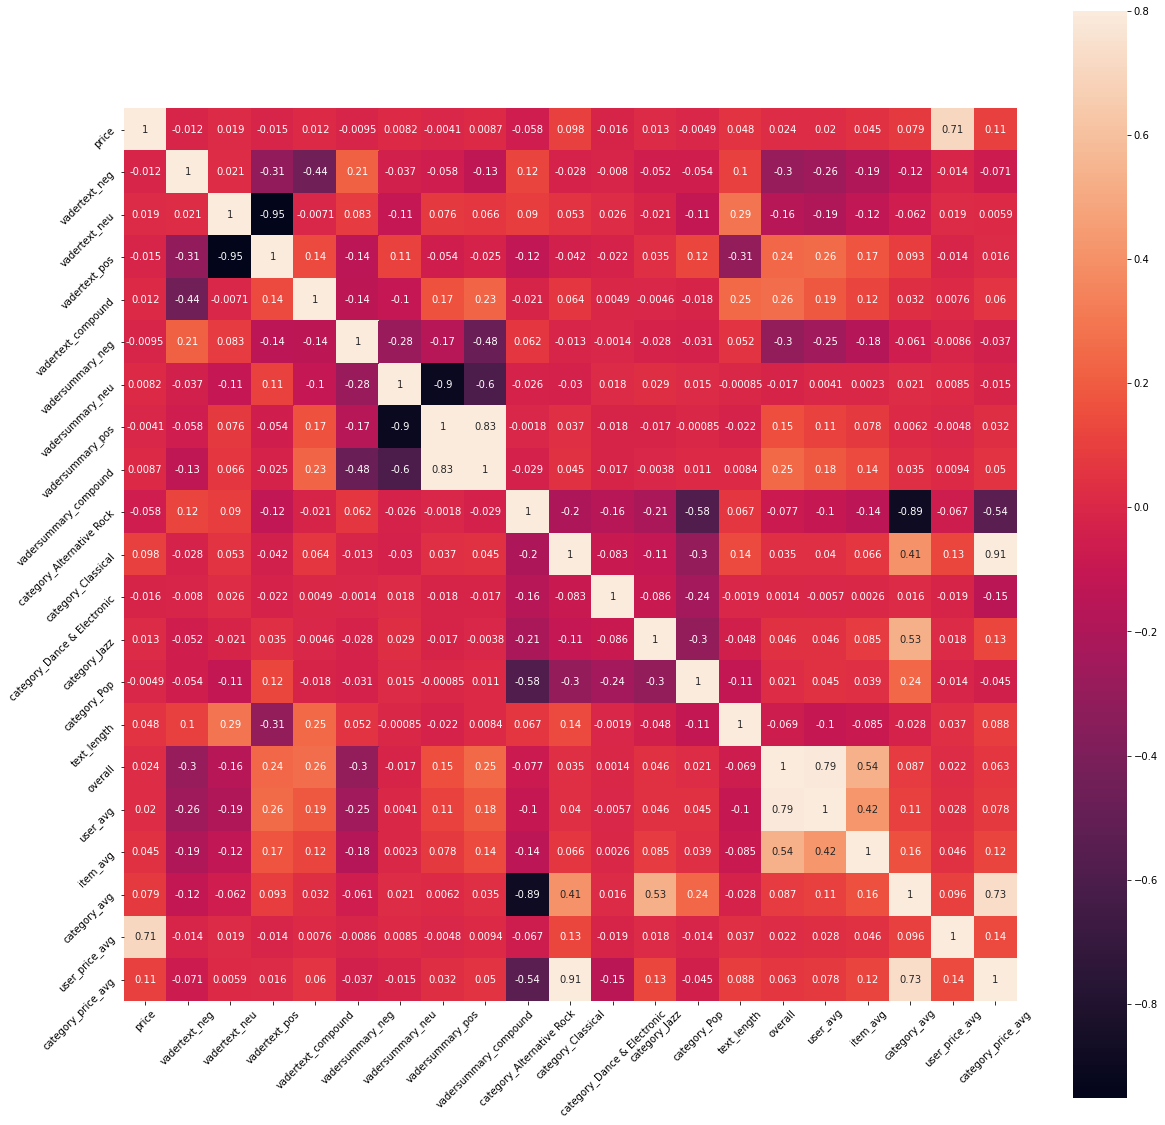

In [111]:
import seaborn as sns;
plt.figure(figsize=(20,20))
#plot heatmap to illustrate the correlation between features and between features and target
sns.heatmap(corr, vmax=0.8, annot=True,square=True)
plt.xticks(rotation=45, fontsize= 10);plt.yticks(rotation=45, fontsize= 10);

The correlation matrix shows that most of the features are independent while some of the features show a relatively strong dependency on each other such as neutral Vader score and negative Vader score from review and summary.

### Feature selection with Lasso Regression using `0.01` as threshold to avoid overfitting (only features that have coefficients greater than 0.01 would be selected to train the model).

In [112]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train_fs_no = fs_train.drop(['overall'], axis=1)
x_train_fs = pd.DataFrame(scaler.fit_transform(x_train_fs_no),columns = x_train_fs_no.columns)

x_test_fs_no = X_test_df.drop(['overall','reviewTime', 'reviewerID','reviewText','summary','category','itemID','reviewHash'], axis=1)

x_test_fs = pd.DataFrame(scaler.transform(x_test_fs_no),columns = x_test_fs_no.columns)
y_train_final = X_train_df.overall
y_test_final = X_test_df.overall

# Use 5-folder cv of Lasso regression for feature selection
estimator_lasso = LassoCV(cv=5, normalize = True)
# Set a minimum threshold of 0.01
sfm = SelectFromModel(estimator_lasso,threshold=0.01, prefit=False, norm_order=1, max_features=None)

sfm.fit(x_train_fs, y_train_final)

feature_idx = sfm.get_support()
feature_name = x_train_fs.columns[feature_idx]
feature_name

Index(['vadertext_neg', 'vadertext_pos', 'vadertext_compound',
       'vadersummary_neg', 'vadersummary_pos', 'vadersummary_compound',
       'category_Pop', 'user_avg', 'item_avg', 'category_avg',
       'user_price_avg', 'category_price_avg'],
      dtype='object')

The lasso regression selected 12 out of 20 numerical features. 

In [113]:
#Transform traning dataset(train set and validation set)
X_train_final = sfm.transform(x_train_fs)
X_validation_final = sfm.transform(x_test_fs)


In [114]:
#Transform testing dataset

X_test_final_no = df_t.drop(['reviewTime', 'reviewerID','reviewText','summary','category','itemID','reviewHash'], axis=1)
X_test_final = sfm.transform(pd.DataFrame(scaler.transform(X_test_final_no),columns = X_test_final_no.columns))

### Feature selection using Random Forest

Using feature importance, used for comparison

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

#select the feature importance greater than average
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,max_depth = 30))
sel.fit(x_train_fs, y_train_final)
feature_idx = sel.get_support()
feature_name = x_train_fs.columns[feature_idx]
feature_name

Index(['price', 'vadertext_pos', 'vadertext_compound', 'text_length',
       'user_avg', 'item_avg', 'user_price_avg'],
      dtype='object')

# Model Implementation
Four models will be designed for predicting each user rating based on numerical and text features. The four models are:
 - Recommender System
 - Random Forest Classifier
 - Random Forest Regressor
 - Neural Network


## Model 1: Recommender System
Due to the large number of users and items in the training set, a collaborative filtering recommender system will be trained to make predictions on user ratings because user-based or item based filtering training requires enormous memory space

### Recommender Data Preparation
Preparing the numerical features for the Recommender system.

In [116]:
# collaborative filtering recommender systems only require rating, reviewerID, and itemID
df_train = X_train[['overall','reviewerID','itemID']]
df_train

,overall,reviewerID,itemID
128089,5.0,u82112329,p56854879
13085,5.0,u66601619,p81810291
79829,3.0,u27991405,p76622910
22217,5.0,u60414332,p70932761
9240,5.0,u94139491,p75225470
...,...,...,...
66455,5.0,u27404878,p82919716
53459,5.0,u45184702,p14376689
10742,1.0,u19388363,p13774607
49689,3.0,u74062068,p15083311


In [117]:
# collaborative filtering recommender systems only require rating, reviewerID, and itemID
df_test = X_test[['overall','reviewerID','itemID']]
df_test

,overall,reviewerID,itemID
40217,5.0,u77481859,p61496523
27187,4.0,u89289441,p88617927
1253,5.0,u03015295,p60384789
24630,5.0,u88162185,p25792579
126102,4.0,u37630394,p50566907
...,...,...,...
90436,4.0,u24722938,p00762669
33193,4.0,u64346925,p79634665
108096,5.0,u71441726,p40121482
60023,5.0,u27365593,p13699030


In [118]:
numUsers = len(df.reviewerID.unique())
numItems = len(df.itemID.unique())

print("Number of users:", numUsers)
print("Number of items:", numItems)

Number of users: 63009
Number of items: 24592


In [119]:
# convert reviewerID and itemID into integers starting from 0 in the original training set
labels_reviewer, levels_reviewer = pd.factorize(df.reviewerID)
labels_item, levels_item = pd.factorize(df.itemID)
df['reviewerID_code'] = labels_reviewer
df['itemID_code'] = labels_item


In [120]:
# create the dictionary for the reviewerID and itemID and their integer representation
reviewer_dict = df.set_index('reviewerID')['reviewerID_code'].to_dict()
item_dict = df.set_index('itemID')['itemID_code'].to_dict()

In [121]:
# verify all reviewers and items have an integer representation
len(reviewer_dict), len(item_dict)

(63009, 24592)

Label encoding the reviewer IDs and music IDs.

In [122]:
# apply the integer representation to the 70% training set
df_train['reviewerID_code']= df_train['reviewerID'].map(reviewer_dict)
df_train['itemID_code']= df_train['itemID'].map(item_dict)
df_train

,overall,reviewerID,itemID,reviewerID_code,itemID_code
128089,5.0,u82112329,p56854879,1731,6428
13085,5.0,u66601619,p81810291,10710,8000
79829,3.0,u27991405,p76622910,43512,20959
22217,5.0,u60414332,p70932761,16744,945
9240,5.0,u94139491,p75225470,7885,5602
...,...,...,...,...,...
66455,5.0,u27404878,p82919716,20683,177
53459,5.0,u45184702,p14376689,32959,17944
10742,1.0,u19388363,p13774607,9011,6951
49689,3.0,u74062068,p15083311,17183,17361


In [123]:
# apply the integer representation to the 30% validation/test set
df_test['reviewerID_code']= df_test['reviewerID'].map(reviewer_dict)
df_test['itemID_code']= df_test['itemID'].map(item_dict)
df_test

,overall,reviewerID,itemID,reviewerID_code,itemID_code
40217,5.0,u77481859,p61496523,16181,425
27187,4.0,u89289441,p88617927,19705,6883
1253,5.0,u03015295,p60384789,1205,1140
24630,5.0,u88162185,p25792579,18228,9729
126102,4.0,u37630394,p50566907,57396,20363
...,...,...,...,...,...
90436,4.0,u24722938,p00762669,19166,10455
33193,4.0,u64346925,p79634665,2011,6059
108096,5.0,u71441726,p40121482,39722,11517
60023,5.0,u27365593,p13699030,26336,11814


In [124]:
# only keep the integer representation columns
df_train_clean = df_train[['overall','reviewerID_code','itemID_code']]
df_train_clean

,overall,reviewerID_code,itemID_code
128089,5.0,1731,6428
13085,5.0,10710,8000
79829,3.0,43512,20959
22217,5.0,16744,945
9240,5.0,7885,5602
...,...,...,...
66455,5.0,20683,177
53459,5.0,32959,17944
10742,1.0,9011,6951
49689,3.0,17183,17361


In [125]:
# only keep the integer representation columns
df_test_clean = df_test[['overall','reviewerID_code','itemID_code']]
df_test_clean

,overall,reviewerID_code,itemID_code
40217,5.0,16181,425
27187,4.0,19705,6883
1253,5.0,1205,1140
24630,5.0,18228,9729
126102,4.0,57396,20363
...,...,...,...
90436,4.0,19166,10455
33193,4.0,2011,6059
108096,5.0,39722,11517
60023,5.0,26336,11814


In [126]:
# save dataframes into csv files to local for using in pyspark
df_train_clean.to_csv('df_train_coded.csv', index = False)
df_test_clean.to_csv('df_test_coded.csv', index = False)
df[['overall','reviewerID_code','itemID_code']].to_csv('df_coded.csv', index = False)

### Recommender Implementation


In [127]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('project').getOrCreate()

In [128]:
# load the 70% training set and the 30% test/validation set
path_train = 'df_train_coded.csv'
path_test = 'df_test_coded.csv'
df_train_rs = spark.read.format("csv").option("header", True).option("sep", ",").load(path_train)
df_test_rs = spark.read.format("csv").option("header", True).option("sep", ",").load(path_test)

In [129]:
df_train_rs.show()

+-------+---------------+-----------+
|overall|reviewerID_code|itemID_code|
+-------+---------------+-----------+
|    5.0|           1731|       6428|
|    5.0|          10710|       8000|
|    3.0|          43512|      20959|
|    5.0|          16744|        945|
|    5.0|           7885|       5602|
|    5.0|           4493|      24372|
|    5.0|          10263|       4052|
|    5.0|           8416|      11540|
|    3.0|          35073|       3463|
|    3.0|          60985|       6420|
|    5.0|          19979|      21320|
|    5.0|          28078|        690|
|    5.0|          37051|        339|
|    4.0|          34844|      14588|
|    1.0|          39281|       7072|
|    3.0|          19212|       1127|
|    5.0|          54290|       5821|
|    4.0|           2307|       6638|
|    4.0|          19456|       5716|
|    3.0|           1360|      12251|
+-------+---------------+-----------+
only showing top 20 rows



In [130]:
df_test_rs.show()

+-------+---------------+-----------+
|overall|reviewerID_code|itemID_code|
+-------+---------------+-----------+
|    5.0|          16181|        425|
|    4.0|          19705|       6883|
|    5.0|           1205|       1140|
|    5.0|          18228|       9729|
|    4.0|          57396|      20363|
|    5.0|          53735|       1704|
|    5.0|          30662|       2933|
|    5.0|          60608|      16662|
|    5.0|          22548|      19197|
|    5.0|          27434|          7|
|    5.0|          22224|       1524|
|    4.0|            626|       1286|
|    5.0|          35350|      10782|
|    5.0|          15384|      12980|
|    5.0|          55702|       1032|
|    5.0|           2531|        869|
|    5.0|          24227|      15548|
|    5.0|           8409|       4451|
|    1.0|          12720|      12711|
|    3.0|          12933|        351|
+-------+---------------+-----------+
only showing top 20 rows



In [131]:
# change the column types from string to integer
from pyspark.sql.functions import *
from pyspark.sql.types import *
df_train_rs = df_train_rs.withColumn("itemID_code",col("itemID_code").cast(IntegerType())).withColumn("overall",col("overall").cast(IntegerType())).withColumn("reviewerID_code",col("reviewerID_code").cast(IntegerType()))
df_test_rs = df_test_rs.withColumn("itemID_code",col("itemID_code").cast(IntegerType())).withColumn("overall",col("overall").cast(IntegerType())).withColumn("reviewerID_code",col("reviewerID_code").cast(IntegerType()))

Implementing the recommender system with Alternating Least Square (ALS) matrix factorization on PySpark.

In [132]:
# built model via ALS
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit
als = ALS(userCol= "reviewerID_code", itemCol= "itemID_code", ratingCol="overall", coldStartStrategy = "drop")
eval = RegressionEvaluator(metricName= "mse", labelCol= "overall", predictionCol= "prediction")
model = als.fit(df_train_rs)
predictions = model.transform(df_test_rs)
mse = eval.evaluate(predictions)

In [133]:
print('MSE for validation set:', mse)

MSE for validation set: 14.353197496856302


Rounding the predictions of the recommender sytem to the nearest integer.

In [134]:
# round the prediction to the nearest integer; round to 1 for any prediction less than 1; round to 5 for any prediction greater than 5
import pyspark.sql.functions as func
predictions_round = predictions.withColumn("prediction_round", \
              when(predictions["prediction"] <= 1, 1).when(predictions["prediction"] >= 5, 5).otherwise(func.round(predictions["prediction"]).cast('integer')))
predictions_round = predictions_round.withColumn("prediction_round",col("prediction_round").cast(FloatType()))

eval = RegressionEvaluator(metricName= "mse", labelCol= "overall", predictionCol= "prediction_round")
mse_round = eval.evaluate(predictions_round)

In [135]:
print('MSE for validation set after rounding:', mse_round)

MSE for validation set after rounding: 8.92740750634433


In [136]:
df_count_reviewer = df_train_rs.groupBy('reviewerID_code').count()
print('average number of music items a reviewer rated:')
df_count_reviewer.filter(df_count_reviewer['count'] > -1).agg({"count": "avg"}).show()

average number of music items a reviewer rated:
+------------------+
|        avg(count)|
+------------------+
|2.0309870597110193|
+------------------+



In [137]:
df_count_item = df_train_rs.groupBy('itemID_code').count()
print('average number of times a music was rated:')
df_count_item.filter(df_count_item['count'] > -1).agg({"count": "avg"}).show()

average number of times a music was rated:
+-----------------+
|       avg(count)|
+-----------------+
|4.601025371368476|
+-----------------+



On average each reviewer only rated `2.03` music items and each music was only rated for `4.60` times.

In [138]:
print('Number of reviewers who rated only once:', df_count_reviewer.filter(df_count_reviewer['count']==1).count())

Number of reviewers who rated only once: 30872


In [139]:
print('Number of music items that got rated only once:', df_count_item.filter(df_count_item['count']==1).count())

Number of music items that got rated only once: 5950


Almost half of the reviewers (i.e. 30872 reviewers) only provided one rating and nearly a quarter of the music items (i.e. 5950 music items) was rated only once.

## Model 2: Random Forest Classifier

Training the Random Forest Classifier with the TFIDF features generated from the cleaned ‘reviewText’.

ADASYN oversampling method is performed on the training data to balance the overall dataset since the overall rating score is highly biased with a majority of the score being 5.

The n_estimator and maximum depth hyperparameters were tuned to get the final model, which determines the number of trees in the forest and maximum depth of trees respectively.

In [140]:
# Resampling the trained vectorizer using the ADASYN, oversampling method. 
X_resampled, y_resampled = ADASYN().fit_resample(tfidf_x_train, y_train)

#best model with tuned hyperparamter
rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy',random_state=0)
rf.fit(X_resampled, y_resampled)
tfidf_prediction = rf.predict(tfidf_x_test)
tfidf_score = sklearn.metrics.mean_squared_error(y_validation, tfidf_prediction)
print("mse with Random forest:   %0.3f" % tfidf_score)
print(sklearn.metrics.classification_report(y_validation, tfidf_prediction))

mse with Random forest:   1.140
              precision    recall  f1-score   support

         1.0       0.29      0.48      0.36      1398
         2.0       0.22      0.10      0.14      1524
         3.0       0.29      0.15      0.20      3539
         4.0       0.34      0.41      0.37      8882
         5.0       0.77      0.77      0.77     29657

    accuracy                           0.62     45000
   macro avg       0.38      0.38      0.37     45000
weighted avg       0.62      0.62      0.61     45000



The random forest classifier has an MSE of `1.140` and an accuracy of `0.62` on the validation set.

In [141]:
#transform the test review with tfidf
tfidf_test_review = tfidf_vectorizer.transform(processed_test_review_text)

#predict the test review
prediction=rf.predict(tfidf_test_review)

rating_pairs = pd.read_csv('rating_pairs.csv')
rating_pairs['prediction'] = prediction
rating_pairs.to_csv('Random_Forest_Classifier_Prediction.csv', index=False)

## Model 3: Random Forest Regressor

Training the Random Forest Regressor on the top 5000 TF-IDF Features of the cleaned `reviewText` column.

The optimal parameters after hyperparameter tuning are:
 - Number of estimators (`n_estimators`): `100`
 - `criterion` : `MSE`
 - Depth of each estimator (`max_depth`): `32`
 - Square root of 5000 features when each estimator is looking for best split

In [142]:
# best RandomForestRegessor model after hyperparameter tuning
regr = RandomForestRegressor(max_depth=32, random_state=0, n_estimators=100, max_features='sqrt')

# Training and Testing on train_dataset
regr = regr.fit(tfidf_x_train, y_train)
train_predictions = regr.predict(tfidf_x_train)
train_mse = sklearn.metrics.mean_squared_error(y_train, train_predictions)
print('Accuracy of Random Forest Regressor on Train Set', train_mse)

# Testing on test_dataset
test_predictions = regr.predict(tfidf_x_test)
test_mse = sklearn.metrics.mean_squared_error(y_validation, test_predictions)
print('Accuracy of Random Forest Regressor on Test Set', test_mse)

Accuracy of Random Forest Regressor on Train Set 0.6102298654080208
Accuracy of Random Forest Regressor on Test Set 0.768038471110271


The model achieved a mean squared error of `0.61` on training set and `0.768` on validation set.

In [143]:
result_df = pd.read_csv('rating_pairs.csv')
final_predictions = regr.predict(tfidf_test_review)
result_df['prediction'] = final_predictions
result_df.to_csv('Random_Forest_Regressor_Prediction.csv', index=False)


## Model 4: Neural Network

Building a neural network with three hidden layers with `5000` nodes at the input layer (equivalent to the number of features used in vectorizer), with `10` nodes at the first two hidden layers and `8` at the last hidden layer.

`Sigmoid` activation fucntion will be used for the first hidden layer and `relu` for the last two hidden layers to speed up the training process.

The output layer will have one node with no activation function.
`Mean Squared Error` will beused as loss with `Adam` as the optimizer.

**Note: running the code below might cause your session to collapse**

In [144]:
# define regression neural network
# def regression_model():
#     model = Sequential()
#     model.add(Dense(10, input_dim=5000, activation='sigmoid'))
#     model.add(Dense(10, activation='relu'))
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
#     return model

In [145]:
# initialize regression model
# my_model=regression_model()

Initializing stopping callback to prevent overfitting.

In [146]:
# define early stopping callback
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=0)

Setting the batch size for the training process to `1024`.

In [147]:
# train the model with training data and validate using validation data
# my_model.fit(X_train_tf,y_train,validation_data=(X_validation_tf,y_validation),epochs=50,batch_size=1024,callbacks=[es])

Loading the best model `best_neural_network_model.h5`

In [148]:
# load best model
my_model=load_model('best_neural_network_model.h5')

In [149]:
# using trained model to make prediction for training data and testing data
train_prediction=my_model.predict(X_train_tf)
validation_prediction=my_model.predict(X_validation_tf)

In [150]:
# use best model to make prediction for training and validation data
train_mse = mean_squared_error(train_prediction,y_train)
validation_mse = mean_squared_error(validation_prediction,y_validation)
print('MSE on training set: {}'.format(np.round(train_mse,4)))
print('MSE on validation set: {}'.format(np.round(validation_mse,4)))

MSE on training set: 0.4689
MSE on validation set: 0.5458


The mean squared error of prediction on training set is `0.469` and on validation set is `0.546`.

Make prediction for test data

In [151]:
# read test data into dataframe
test=pd.read_csv('test.csv.zip')

In [152]:
# use trained vectorizer to transform test data
X_test_tf=vectorizer.transform(processed_test_review_text)

In [153]:
# convert sparse matrix to dense
X_test_tf=X_test_tf.todense()

In [154]:
# make prediction for test data
test_prediction=my_model.predict(X_test_tf)

In [155]:
# read rating pairs into dataframe
rating_pairs=pd.read_csv('rating_pairs.csv')

In [156]:
# fill the prediction column with prediction from model
rating_pairs['prediction']=test_prediction

In [157]:
# save the prediction as a csv file
rating_pairs.to_csv('Neural_Net_Rating_Prediction.csv',index=False)


Overall, the neural network as regression model performed better than classification models and ensemble models.